# COVID-19 Risk Stratification
(description}

## Dataset 

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
xls = pd.ExcelFile('/home/shikha/Documents/PS1/COVID-19/input/Hospital104.xlsx')
df = pd.read_excel(xls, 'Batch2_Data')

In [3]:
df

,Sample No.,Patient ID,Study ID,Age,Gender,BMI,Symptoms Presented,Symptoms Present?,Fever,Cough,...,ERYTHROCYTE SEDIMENTATION RATE,PRO-CALCITONIN,D-DIMER,IL-6,SERUM FERRITIN,ECG,CXR,CORADS SCORE ON HRCT,PATIENT CATEGORY,PLASMA THERAPY
0,1013,IGIB1040201013,IGIB1040201013-1,53,1,22.5,"fever, cough,breathlessness",1,1,1,...,8.0,NaN,98,NaN,NaN,sinus rhythm,normal,4,5a,No
1,1014,IGIB1040201014,IGIB1040201014-1,26,0,25.7,asymptomatic,0,0,0,...,NaN,NaN,0.2,NaN,NaN,sinus rhythm,normal,0,5b,No
2,1015,IGIB1040201015,IGIB1040201015-1,28,1,22.2,asymptomatic,0,0,0,...,4.0,0.20,0.35,NaN,NaN,sinus rhythm,normal,0,5b,No
3,1016,IGIB1040201016,IGIB1040201016-1,73,1,21.5,"fever, cough,breathlessness",1,1,1,...,NaN,NaN,NaN,63.31,NaN,sinus rhythm,normal,5,4,No
4,1060,IGIB1040201060,IGIB1040201060-1,49,1,27.4,"fever,cough",1,1,1,...,8.0,NaN,350.55,4.33,NaN,sinus rhythm,normal,5,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,950,IGIB104020950,IGIB104020950-1,53,1,27.2,"fever, cough,breathlessness",1,1,1,...,14.0,NaN,410,NaN,NaN,sinus rhythm,normal,5,4,No
187,965,IGIB104020965,IGIB104020965-1,33,1,26.0,"fever, cough,breathlessness",1,1,1,...,6.0,NaN,1120,37.90,NaN,sinus tachycardia,normal,5,4,No
188,9667,IGIB1040209667,IGIB1040209667-1,70,1,21.4,"fever, breathlessness",1,1,0,...,8.0,0.54,1078,735.60,NaN,sinus rhythm,normal,5,4,No
189,9759,IGIB1040209759,IGIB1040209759-1,65,0,22.4,breathlessness and cough,1,0,1,...,6.0,NaN,1224,NaN,NaN,sinus rhythm,normal,6,4,No


In [4]:
df.describe()

,Sample No.,Age,Gender,BMI,Symptoms Present?,Fever,Cough,Breathlessness,Travel History,Temp,...,UREA,CREATININE,SODIUM,POTASSIUM,CHLORIDE,LACTATE DEHYDROGENASE4,ERYTHROCYTE SEDIMENTATION RATE,PRO-CALCITONIN,IL-6,SERUM FERRITIN
count,191.000000,191.000000,191.000000,188.000000,191.000000,191.000000,191.000000,191.000000,191.000000,189.000000,...,184.000000,184.000000,182.000000,182.000000,182.000000,101.000000,92.000000,51.000000,47.000000,65.000000
mean,4674.560209,47.471204,0.617801,23.083191,0.832461,0.497382,0.413613,0.392670,0.020942,98.242328,...,38.034783,32.826087,1012.218681,5.593956,105.246703,521.916832,10.808696,1.672549,405.037872,382.350000
std,2650.590877,18.381855,0.487202,1.604113,0.374438,0.501307,0.493775,0.489628,0.143568,1.249386,...,29.426918,427.487868,11775.539089,10.490022,11.940546,471.188023,6.455999,3.022584,1054.095729,502.651379
min,246.000000,5.000000,0.000000,18.700000,0.000000,0.000000,0.000000,0.000000,0.000000,95.700000,...,11.800000,0.300000,11.800000,2.800000,1.100000,11.800000,2.000000,0.010000,0.800000,11.800000
25%,1651.000000,34.000000,0.000000,22.100000,1.000000,0.000000,0.000000,0.000000,0.000000,97.300000,...,21.000000,0.900000,137.000000,3.800000,104.000000,250.000000,6.000000,0.060000,6.550000,111.800000
50%,6257.000000,47.000000,1.000000,22.750000,1.000000,0.000000,0.000000,0.000000,0.000000,98.100000,...,26.700000,1.000000,140.000000,4.300000,108.000000,447.300000,8.000000,0.400000,29.680000,236.900000
75%,6687.500000,60.500000,1.000000,24.100000,1.000000,1.000000,1.000000,1.000000,0.000000,98.900000,...,43.300000,1.200000,143.000000,4.900000,110.000000,666.000000,14.000000,0.900000,260.990000,388.000000
max,9766.000000,92.000000,1.000000,27.400000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000,...,176.000000,5800.000000,159000.000000,104.000000,125.000000,3250.000000,26.000000,12.540000,4967.800000,2378.900000


### Missing Data

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [5]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Sample No.
False    191
Name: Sample No., dtype: int64

Patient ID
False    191
Name: Patient ID, dtype: int64

Study ID
False    191
Name: Study ID, dtype: int64

Age
False    191
Name: Age, dtype: int64

Gender
False    191
Name: Gender, dtype: int64

BMI
False    188
True       3
Name: BMI, dtype: int64

Symptoms Presented
False    191
Name: Symptoms Presented, dtype: int64

Symptoms Present?
False    191
Name: Symptoms Present?, dtype: int64

Fever
False    191
Name: Fever, dtype: int64

Cough
False    191
Name: Cough, dtype: int64

Breathlessness
False    191
Name: Breathlessness, dtype: int64

Travel History
False    191
Name: Travel History, dtype: int64

Temp
False    189
True       2
Name: Temp, dtype: int64

SPO2
False    188
True       3
Name: SPO2, dtype: int64

METHYLPREDNISOLONE
False    191
Name: METHYLPREDNISOLONE, dtype: int64

Low molecular weight heparin
False    191
Name: Low molecular weight heparin, dtype: int64

Hydroxychloroquine
False    191
Name: Hydroxychloro

Outcome is an important parameter for us to measure. We observe that outcome is heavily correlated to ventilatory support sequired, shown below.

In [6]:
df['Outcome'] = pd.to_numeric(df.Outcome, errors='coerce')
outcome = df.dropna(subset=["Outcome","Ventilatory support required"], axis=0)
outcome[["Outcome","Ventilatory support required"]].corr()

,Outcome,Ventilatory support required
Outcome,1.000000,0.904134
Ventilatory support required,0.904134,1.000000


In [7]:
df_gptest = df[['Outcome','Ventilatory support required']]
grouped = df_gptest.groupby(['Outcome','Ventilatory support required'],as_index=False).size()
grouped_pivot = grouped.pivot(index='Outcome',columns='Ventilatory support required')
grouped_pivot

size          
Ventilatory support required    0.0  1.0  2.0
Outcome                                      
0.0                           116.0  1.0  NaN
1.0                             1.0  6.0  9.0

According to the table above, it would be okay to replace the null values of Outcome as 0 if no ventilatory support was needed, and 1 if ventilatory support severity is 1(Non-invasive ventilation) or 2(Intubation).

In [8]:
df['Outcome'].fillna(df['Ventilatory support required'], inplace=True)
df['Outcome'].replace(2,1, inplace=True)
df['Outcome'].value_counts()

0.0    159
1.0     29
Name: Outcome, dtype: int64

## Initial Factors and Vital Signs

Let us take a close look at the initial signs of disease that set in. How much information can we gauge about the patient just when he/she is admitted? Or, can we know the risk level associated with the patient by doing some simple tests at home?

### Features
In this section, we will analyse the following features to gain some idea about how these initial factors and vital signs play a role in the disease onset and severity. We will use the Ventilatory Support to categorize the severity of the disease.

Initial Factors
- Age
- Gender
- BMI
- Contact to N-Covid Person
- Travel history

Vital Signs
- Temperature
- SPO2
- Respiratory Rate
- Random Blood Sugar

These values should be readily available for any patient, and can help in making important decisions regarding the severity of the disease. I believe we can predict if the patient will require ventilatory support or not, which is directly correlated to the outcome of the disease, as shown below.

### Dealing With Missing Values

- BMI, Temperature, Random Blood Sugar: We will replace these values with the mean values.

- Respiratory Rate and SPO2: Some are unavailable, we will drop these rows, since even their ventilatory support data is not available.

In [9]:
avg_BMI=df['BMI'].astype('float').mean(axis=0)
df['BMI'].replace(np.nan, avg_BMI, inplace=True)

avg_Temp=df['Temp'].astype('float').mean(axis=0)
df['Temp'].replace(np.nan, avg_Temp, inplace=True)

avg_BP=df['RANDOM BLOOD SUGAR'].astype('float').mean(axis=0)
df['RANDOM BLOOD SUGAR'].replace(np.nan, avg_BP, inplace=True)

df.dropna(subset=["Ventilatory support required"], axis=0,inplace=True)

### Normalizing Data


<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1. Here we will use min-max normalization for the BMI and temperature data.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age','BMI','Temp','SPO2','Respiratory rate(breaths per minute)','RANDOM BLOOD SUGAR']] = scaler.fit_transform(df[['Age','BMI','Temp','SPO2','Respiratory rate(breaths per minute)','RANDOM BLOOD SUGAR']])
df[['Age','BMI','Temp','SPO2','Respiratory rate(breaths per minute)','RANDOM BLOOD SUGAR']]

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


,Age,BMI,Temp,SPO2,Respiratory rate(breaths per minute),RANDOM BLOOD SUGAR
0,0.551724,0.436782,0.174603,0.833333,0.3,0.259876
1,0.241379,0.804598,0.476190,0.666667,0.1,0.200381
2,0.264368,0.402299,0.428571,0.666667,0.1,0.214660
3,0.781609,0.321839,0.365079,0.666667,0.6,0.255117
4,0.505747,1.000000,0.841270,0.666667,0.3,0.190861
...,...,...,...,...,...,...
186,0.551724,0.977011,0.507937,0.333333,0.7,0.447882
187,0.321839,0.839080,0.571429,0.666667,0.7,0.331271
188,0.747126,0.310345,0.412698,0.833333,0.3,0.421704
189,0.689655,0.425287,0.507937,0.500000,0.9,0.471680


### Correlation between different features
(description)

In [11]:
def plot_count(new_column_name,old_column,groups,group_names):
    df[new_column_name] = pd.cut(df[old_column], groups, labels=group_names, include_lowest=True )
    sns.countplot(df[new_column_name])
    return df
    
def contingency(data,column):
    grouped = data.groupby([column,'Outcome'],as_index=False).size()
    grouped_pivot = grouped.pivot(index=column,columns='Outcome')
    return grouped_pivot

#### Age
First let us look at the age. Its correlation with outcome is approximately 0.435, so it does have some positive linear relationship with the outcome. 

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

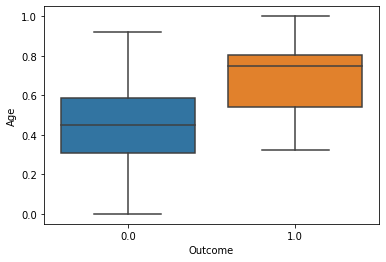

In [12]:
sns.boxplot(x="Outcome", y="Age", data=df)

It looks like age can be a good predictor of the outcome, since most of the deaths have occured in patients above the age of 60, and those below 60 have survived, except a few outliers.
Accordingly, let us group the results in age groups.
- Above 60
- 40 to 60
- 20 to 40
- Below 20

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


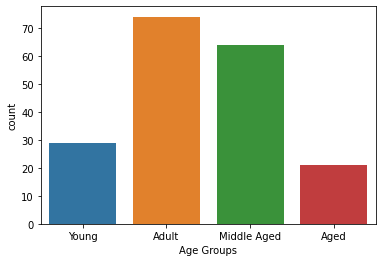

In [13]:
age_groups = np.linspace(df['Age'].min(),df['Age'].max(),5)
group_names = ['Young', 'Adult', 'Middle Aged','Aged']
df = plot_count('Age Groups','Age', age_groups, group_names)

In [14]:
df_age = df[['Age Groups','Outcome']]
c_age = contingency(df_age,'Age Groups')
c_age

size    
Outcome      0.0 1.0
Age Groups          
Young         29   0
Adult         67   7
Middle Aged   54  10
Aged           9  12

We cannot use a chi-squared test here since the value counts can be quite small. 
Another classification worthy to look at is Above 60 and Below 60. Let us try to use fisher's exact test on the classification of above and below 60.

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


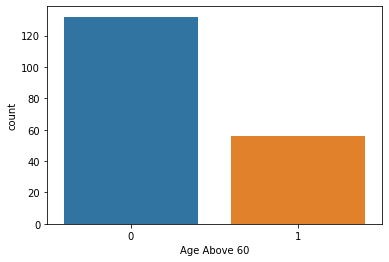

In [17]:
age_groups = [0,0.6,1]
group_names = [0,1]
df = plot_count('Age Above 60','Age',age_groups,group_names)

In [19]:
age = df[['Age Above 60','Outcome']]
c_age = contingency(age,'Age Above 60')
c_age

size    
Outcome       0.0 1.0
Age Above 60         
0             122  10
1              37  19

##### Chi-Squared and Fisher Exact Test on age groups

In [21]:
oddsratio, pvalue = scipy.stats.fisher_exact(np.array(c_age))
pvalue

2.7343882537215717e-05

In [22]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(c_age), correction=False)
chi2, p

(20.930455216727175, 4.76262195624435e-06)

Both these tests tell us that there is a strong correlation between the outcome of the patient and if he/she is above 60 or not. Let us explore further.

#### Gender
(description)

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

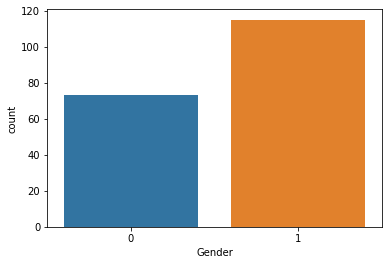

In [23]:
sns.countplot(df['Gender'])

In [25]:
df_gender = df[['Gender','Outcome']]
c_gender = contingency(df_gender,'Gender')
c_gender

size    
Outcome  0.0 1.0
Gender          
0         65   8
1         94  21

##### Fisher's exact test for gender dependency on the outcome

In [27]:
oddsratio, pvalue = scipy.stats.fisher_exact(np.array(c_gender))
pvalue

0.2162571534492208

Since the p-value < 5%, we can conclude that there is some dependency of gender on the final outcome.

#### Outcome probability based on age group + gender

In [ ]:
age_gender = df[['Age Above 60','Gender','Outcome']]
basics = age_gender.query("Outcome == 1").groupby(['Age Above 60','Gender'],as_index=False).size()
basics_pivot = basics.pivot(index='Gender',columns='Age Above 60')
basics_pivot

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
im = ax.pcolor(basics_pivot, cmap='Reds')

#label names
row_labels = basics_pivot.columns.levels[1]
col_labels = ['Female','Male']

#move ticks and labels to the center
ax.set_xticks(np.arange(basics_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(basics_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

From the analysis above, we can see clearly that covid-affected males above the age of 60 are at the highest risk of mortality from the disease.

#### BMI
(description)

In [ ]:
sns.boxplot(x="Outcome", y="BMI", data=df)

It doesn't look like we can get much information with BMI data for the patient, since it is quite evenly distributed. Thus, we will not use this as one of our features.

#### Temperature
(description)

In [ ]:
sns.boxplot(x="Outcome", y="Temp", data=df)

It doesn't look like we can get much information with temperature data for the patient, since it is quite evenly distributed. Thus, we will not use this as one of our features.

In [ ]:
df['Temp']=df['Temp'].round(1)

temp_groups = np.linspace(df['Temp'].min(),df['Temp'].max(),6)
group_names = [0.2,0.4,0.6,0.8,1]
df['Temp Groups'] = pd.cut(df['Temp'], resp_groups, labels=group_names, include_lowest=True )
sns.countplot(df['Temp Groups'])

df_gptest = df[['Temp Groups','Outcome']]
grouped = df_gptest.groupby(['Temp Groups','Outcome'],as_index=False).size()
grouped_pivot = grouped.pivot(index='Temp Groups',columns='Outcome')
grouped_pivot

#### Contact to NCOVID Patient
(description)

In [ ]:
sns.countplot(df["Contact to NCOVID Patient"])

In [ ]:
df_gptest = df[['Contact to NCOVID Patient','Outcome']]
grouped = df_gptest.groupby(['Contact to NCOVID Patient','Outcome'],as_index=False).size()
grouped_pivot = grouped.pivot(index='Contact to NCOVID Patient',columns='Outcome')
grouped_pivot

In [ ]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(grouped_pivot), correction=False)
chi2, p

The p-value in the chi2 test is > 0.5 and so, this is mostly an independent feature from outcome. We will not use this.

#### Travel History
(description)

In [ ]:
sns.countplot(df["Travel History"])

In [ ]:
df_gptest = df[['Travel History','Outcome']]
grouped = df_gptest.groupby(['Travel History','Outcome'],as_index=False).size()
grouped_pivot = grouped.pivot(index='Travel History',columns='Outcome')
grouped_pivot

In [ ]:
oddsratio, pvalue = scipy.stats.fisher_exact(np.array(grouped_pivot))
pvalue

The p-value in the Fisher exact test is > 0.5 and so, this is mostly an independent feature from outcome. We will not use this.

#### SPO2
(description)

In [ ]:
sns.boxplot(x="Outcome", y="SPO2", data=df)

It doesn't look like we can get much information with SPO2 data for the patient, since it is quite evenly distributed. Thus, we will not use this as one of our features.

#### Respiratory Rate
(description)

In [ ]:
sns.boxplot(x="Outcome", y="Respiratory rate(breaths per minute)", data=df)

In [ ]:
# create a new column of percentile rank
df['Respiratory rate(breaths per minute)']=df['Respiratory rate(breaths per minute)'].round(1)

resp_groups = np.linspace(df['Respiratory rate(breaths per minute)'].min(),df['Respiratory rate(breaths per minute)'].max(),6)
group_names = [0.2,0.4,0.6,0.8,1]
df['Respiratory Rate Groups'] = pd.cut(df['Respiratory rate(breaths per minute)'], resp_groups, labels=group_names, include_lowest=True )
sns.countplot(df['Respiratory Rate Groups'])

df_gptest = df[['Respiratory Rate Groups','Outcome']]
grouped = df_gptest.groupby(['Respiratory Rate Groups','Outcome'],as_index=False).size()
grouped_pivot = grouped.pivot(index='Respiratory Rate Groups',columns='Outcome')
grouped_pivot

This seems like a good indicator for our the outcome. Let us consider it.

#### Random Blood Sugar
(description)

In [ ]:
sns.boxplot(x="Outcome", y="RANDOM BLOOD SUGAR", data=df)

It doesn't look like we can get much information with blood sugar data for the patient, since it is quite evenly distributed. Thus, we will not use this as one of our features.

Let us try to develop some models that can help us see if we can classify the severity risk.

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Training Model

In [ ]:
lm = LogisticRegression(max_iter=1000)
X = df[['Age Above 60','Gender','Temp Groups','Respiratory Rate Groups']]
Y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
lm.fit(x_train,y_train)
prediction = lm.predict(x_test)
score = lm.score(x_test, y_test)
print(score)

#### How well the model runs on the training set -

In [ ]:
cm = metrics.confusion_matrix(y_train, lm.predict(x_train))
plt.figure
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
print("Train Set")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(lm.score(x_train, y_train))
plt.title(all_sample_title, size = 15);
plt.savefig('covidseverity.png')

#### How well the model runs on the test set -

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
print("Test Set")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('covidseverity.png')

#### Error in this model

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
print('The mean square error of actual and predicted value is: ', mse)

#### Precision and Recall

### Symptoms

With relation to symptoms, there are a few questions we can answer with the data we have.
1. How are these symptoms related to each other? And to the initial factors?
2. How will the symptoms affect the vital signs of the patient?
3. Which symptom is the strongest indicator of severity of the disease?
4. Which medications are most effective to treat these symptoms?
5. Do asymptomatic patients have a better response?

We have three major symptoms in the data - fever, cough and breathlessness. Let us examine them.

In [ ]:
symptoms = df[['Fever','Breathlessness','Cough','Outcome']]

In [ ]:
sns.countplot(df['Symptoms Present?'])

In [ ]:
df_symptoms = df[['Symptoms Present?','Outcome']]
grouped_symptoms = df_symptoms.groupby(['Symptoms Present?','Outcome'],as_index=False).size()
grouped_symptoms_pivot = grouped_symptoms.pivot(index='Symptoms Present?',columns='Outcome')
grouped_symptoms_pivot

From this, we can see that asymptomatic patients do not die. This can be a strong indicator in our model.

#### Fever
(description)

In [ ]:
sns.countplot(df['Fever'])

In [ ]:
df_fever = df[['Fever','Outcome']]
grouped_fever = df_fever.groupby(['Fever','Outcome'],as_index=False).size()
grouped_fever_pivot = grouped_fever.pivot(index='Fever',columns='Outcome')
grouped_fever_pivot

##### Chi-sqaured test for fever dependency on the outcome

In [ ]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(grouped_fever_pivot))
chi2, p

Since the p-value > 5%, we can conclude that there is no dependency of only fever on the final outcome.

#### Cough
(description)

In [ ]:
sns.countplot(df['Cough'])

In [ ]:
df_cough = df[['Cough','Outcome']]
grouped_cough = df_cough.groupby(['Cough','Outcome'],as_index=False).size()
grouped_cough_pivot = grouped_cough.pivot(index='Cough',columns='Outcome')
grouped_cough_pivot

##### Chi-squared exact test for cough dependency on the outcome

In [ ]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(grouped_cough_pivot))
chi2, p

Since the p-value << 5%, we can conclude that there is a strong dependency of cough on the final outcome.

#### Breathlessness
(description)

In [ ]:
sns.countplot(df['Breathlessness'])

In [ ]:
df_Breathlessness = df[['Breathlessness','Outcome']]
grouped_Breathlessness = df_Breathlessness.groupby(['Breathlessness','Outcome'],as_index=False).size()
grouped_Breathlessness_pivot = grouped_Breathlessness.pivot(index='Breathlessness',columns='Outcome')
grouped_Breathlessness_pivot

##### Fisher's exact test for breathlessness dependency on the outcome

In [ ]:
oddsratio, pvalue = scipy.stats.fisher_exact(np.array(grouped_Breathlessness_pivot))
pvalue

Since the p-value <<< 5%, we can conclude that breathlessness is the strongest indicator of the final outcome.

In [ ]:
grouped_symptoms = symptoms.groupby(['Fever','Cough','Breathlessness'],as_index=False).mean().round(2)
grouped_symptoms

In [ ]:
grouped_symptoms = symptoms.groupby(['Fever','Cough','Breathlessness'],as_index=False).size()
grouped_symptoms

### Comorbidities

With relation to comorbidities, there are a few questions we will answer this very imprtant question.
1. Which comorbidity is the most dangerous?

We have three major comorbidities in the dataset - diabetes, hypertension and heart conditions. Let us examine them.

In [ ]:
comorbidities = df[['Diabetes', 'Hypertension','Heart Condition','Outcome']]

In [ ]:
sns.countplot(df['Co-morbidity?'])

In [ ]:
df_com = df[['Co-morbidity?','Outcome']]
grouped_com = df_com.groupby(['Co-morbidity?','Outcome'],as_index=False).size()
grouped_com_pivot = grouped_com.pivot(index='Co-morbidity?',columns='Outcome')
grouped_com_pivot

In [ ]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(grouped_com_pivot))
chi2, p

From this, we can see that patients without comorbidities are less likely to have a fatal outcome. This can be an indicator in our model.

#### Diabetes
(description)

In [ ]:
sns.countplot(df['Diabetes'])

In [ ]:
df_Diabetes = df[['Diabetes','Outcome']]
grouped_Diabetes = df_Diabetes.groupby(['Diabetes','Outcome'],as_index=False).size()
grouped_Diabetes_pivot = grouped_Diabetes.pivot(index='Diabetes',columns='Outcome')
grouped_Diabetes_pivot

##### Chi-sqaured test for diabetes dependency on the outcome

In [ ]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(grouped_Diabetes_pivot))
chi2, p

Since the p-value < 5%, we can conclude that there is a dependency of diabetes on the final outcome.

#### Hypertension
(description)

In [ ]:
sns.countplot(df['Hypertension'])

In [ ]:
df_Hypertension = df[['Hypertension','Outcome']]
grouped_Hypertension = df_Hypertension.groupby(['Hypertension','Outcome'],as_index=False).size()
grouped_Hypertension_pivot = grouped_Hypertension.pivot(index='Hypertension',columns='Outcome')
grouped_Hypertension_pivot

##### Chi-squared exact test for hypertension dependency on the outcome

In [ ]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(grouped_Hypertension_pivot))
chi2, p

Since the p-value < 5%, we can conclude that there is a dependency of Hypertension on the final outcome.

#### Heart Conditions
(description)

In [ ]:
sns.countplot(df['Heart Condition'])

In [ ]:
df_heart = df[['Heart Condition','Outcome']]
grouped_heart = df_heart.groupby(['Heart Condition','Outcome'],as_index=False).size()
grouped_heart_pivot = grouped_heart.pivot(index='Heart Condition',columns='Outcome')
grouped_heart_pivot

In [ ]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(grouped_heart_pivot))
chi2, p

##### Fisher's exact test for heart condition dependency on the outcome

In [ ]:
grouped_com = comorbidities.groupby(['Diabetes','Hypertension','Heart Condition'],as_index=False).mean().round(2)
grouped_com

In [ ]:
grouped_com = comorbidities.groupby(['Diabetes','Hypertension','Heart Condition'],as_index=False).size()
grouped_com

Let us try to develop some models that can help us see if we can classify the severity risk.

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Training Model

In [ ]:
lm = LogisticRegression(max_iter=1000)
X = df[['Age Above 60','Gender','Temp Groups','Respiratory Rate Groups','Symptoms Present?','Co-morbidity?','Cough','Breathlessness','Hypertension','Diabetes']]
Y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
lm.fit(x_train,y_train)
prediction = lm.predict(x_test)
score = lm.score(x_test, y_test)
print(score)

#### How well the model runs on the training set -

In [ ]:
cm = metrics.confusion_matrix(y_train, lm.predict(x_train))
plt.figure
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
print("Train Set")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(lm.score(x_train, y_train))
plt.title(all_sample_title, size = 15);
plt.savefig('covidseverity.png')

#### How well the model runs on the test set -

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plt.figure
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
print("Test Set")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('covidseverity.png')

#### Error in this model

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
print('The mean square error of actual and predicted value is: ', mse)

#### Precision and Recall

## Blood 
(description)

In [ ]:
blood = df[['HEMOGLOBIN','TLC COUNT','PLATELET COUNT','RANDOM BLOOD SUGAR','UREA','CREATININE','SODIUM','POTASSIUM','CHLORIDE','TOTAL BILIRUBIN','DIRECT BILIRUBIN','SGOT','SGPT','TOTALPROTEINS','ALBUMIN','ALKALINE PHOSPHATASE','LACTATE DEHYDROGENASE4','C-REACTIVE PROTEINS','ERYTHROCYTE SEDIMENTATION RATE','PRO-CALCITONIN','D-DIMER','IL-6','SERUM FERRITIN','Outcome']]

In [ ]:
blood

### Dealing with Missing values

The columns IL-6, D-DIMER, SERUM FERTININ, PRO CALCITONIN, ERYTHROCYTE SEDIMENTATION RATE, LACTATE DEHYDROGENASE4 Have too mnay null values for us to make any useful assumptions from them. Thus we will drop these columns.

All other columns have approximately 10 null values from the same patients, so we shall drop those rows.

In [ ]:
blood.drop(columns=['IL-6', 'D-DIMER', 'SERUM FERRITIN', 'PRO-CALCITONIN', 'ERYTHROCYTE SEDIMENTATION RATE', 'LACTATE DEHYDROGENASE4'],inplace=True)
blood.dropna(subset = ['Outcome'],axis=0,inplace=True)
blood.dropna(axis=0,inplace=True)
blood

In [ ]:
missing_data = blood.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Now there are no missing values in our data.
We have 178 patients data, and now we can analyse how their blood factors are affecting the ventilatory support.

In [ ]:
sns.heatmap(blood.corr())
plt.figure(figsize = (10, 8))

Urea and TLC Count seem to be strong factors of indication from our initial look.

In [ ]:
sns.boxplot(x="Outcome", y="TLC COUNT", data=blood)